In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv(r'C:\Users\prana\Downloads\fake reviews dataset.csv')

X = data['text_']        
y = data['label']        

y = y.map({'CG': 1, 'OR': 0})

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)
X = vectorizer.fit_transform(X.astype(str))


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8607641894398417

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      4071
           1       0.87      0.85      0.86      4016

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087


Confusion Matrix:
 [[3563  508]
 [ 618 3398]]


In [1]:
#import dataset
import pandas as pd
data=pd.read_csv("C:\\Users\\prana\\Downloads\\decision_tree_regressor_dataset_v2.csv")
print(data.head())

   Age  Gender  Monthly_Income  Brand_Awareness  Store_Experience  \
0   58    Male           81476                2                 1   
1   48  Female           64811                2                 4   
2   34    Male           56208                2                 3   
3   27    Male           40150                3                 4   
4   40    Male           91180                3                 4   

   Quality_Rating  Price_Sensitivity  Purchase_Likelihood  
0               3                  3             1.932503  
1               4                  5             1.935945  
2               4                  1             2.375807  
3               5                  5             2.095519  
4               2                  2             1.964777  


Note: you may need to restart the kernel to use updated packages.
R2 Score: 0.7297910802781791


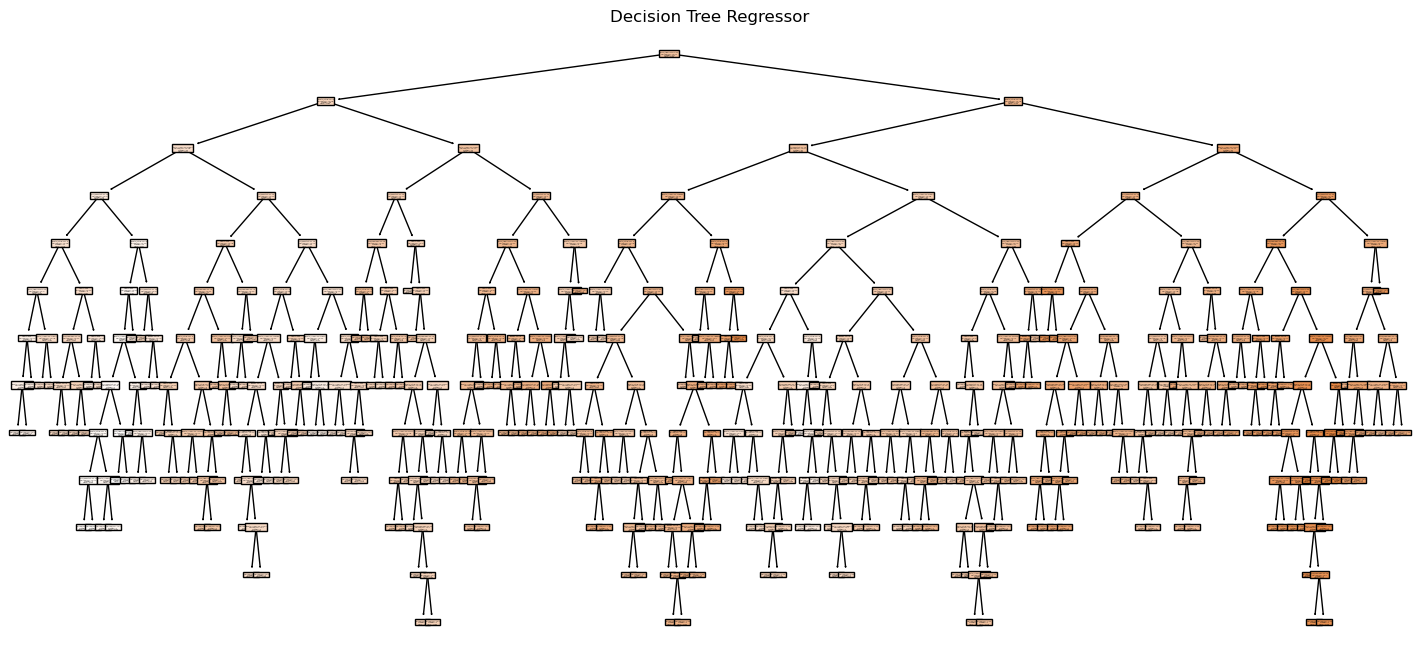

Confusion Matrix : [[15  5  0]
 [ 8  6  6]
 [ 0  3 17]]


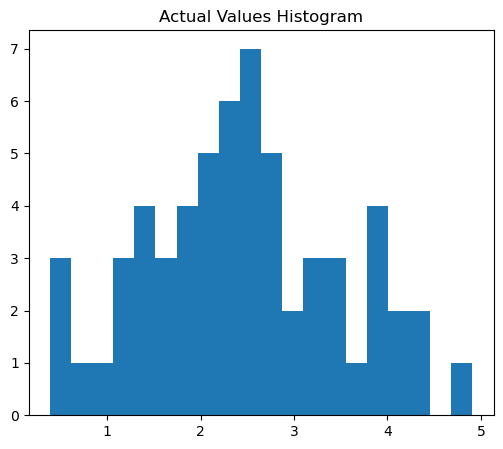

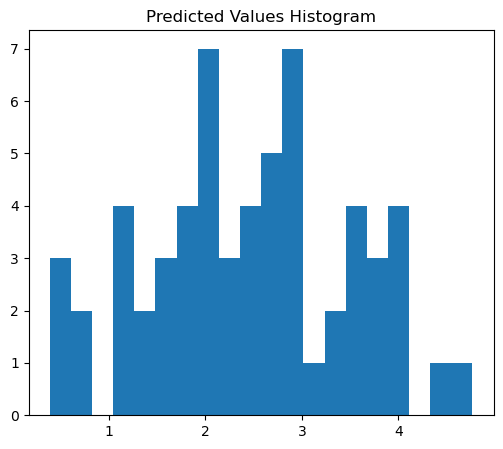

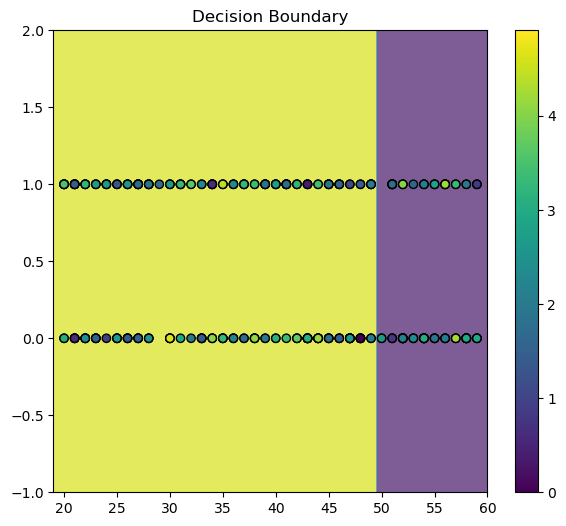

In [2]:
%pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
df=pd.read_csv("C:\\Users\\prana\\Downloads\\decision_tree_regressor_dataset_v2.csv")
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col])
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = DecisionTreeRegressor(criterion="squared_error", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
plt.figure(figsize=(18, 8))
plot_tree(model, feature_names=df.columns[:-1], filled=True)
plt.title("Decision Tree Regressor")
plt.show()
binning = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
y_test_bin = binning.fit_transform(y_test.reshape(-1, 1)).astype(int)
y_pred_bin = binning.transform(y_pred.reshape(-1, 1)).astype(int)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print(f"Confusion Matrix : {cm}")
plt.figure(figsize=(6, 5))
plt.hist(y_test, bins=20)
plt.title("Actual Values Histogram")
plt.show()
plt.figure(figsize=(6, 5))
plt.hist(y_pred, bins=20)
plt.title("Predicted Values Histogram")
plt.show()
if X.shape[1] >= 2:
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    if X.shape[1] > 2:
        extra = np.mean(X[:, 2:], axis=0)
        grid = np.hstack([grid, np.tile(extra, (grid.shape[0], 1))])
    Z = model.predict(grid).reshape(xx.shape)
    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, Z, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title("Decision Boundary")
    plt.colorbar()
    plt.show()